In [1]:
# import all the required libraries
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Unbalanced_15000.csv")

In [2]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

15012

In [3]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [4]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'sadness': 4361,
         'joy': 5077,
         'love': 1244,
         'anger': 2063,
         'fear': 1717,
         'surprise': 1007})

In [5]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [6]:

df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [7]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [8]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [9]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [10]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [11]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [12]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                         feeling little low days back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [13]:
# Do the lametization on the features
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                          feeling little low day back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [14]:
x = df.content
y = df.Emot

In [15]:

SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [16]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))


Train set has total 10828 entries with 28.02% sadness, 33.21% joy, 8.19% love, 13.07% anger, 11.09% fear, 6.42% surprise
Test set has total 4641 entries with 28.59% sadness, 31.91% joy, 7.69% love, 13.96% anger, 11.12% fear , 6.72% surprise


In [17]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [18]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [19]:

def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [20]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [21]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [29]:
def classifivation_report(mf, ng, spl):
    ug_cvec = TfidfVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [30]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [31]:
df['totalwords'] = [len(x.split()) for x in df['content'].tolist()]
# df['totalwords'].head()
df.totalwords.sum(axis = 0, skipna = True) 

139678

In [32]:
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

10575

In [33]:
cvec = TfidfVectorizer()
n_features = np.arange(2000,8001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


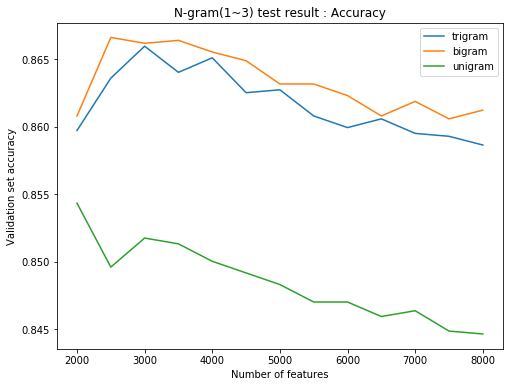

In [34]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [35]:
mf_ = 2500
ng_ = (1,2)
spl_ = 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.66%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1241    58     4     16     7         1
joy            29  1407    33      1     5         6
love            9   103   240      2     1         2
anger          61    64     2    494    25         2
fear           40    39     1      4   396        36
surprise       11    36     0      3    18       244
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.95      0.76      0.85       648
         joy       0.88      0.77      0.82       516
        love       0.82      0.95      0.88      1481
       anger       0.86      0.67      0.75       357
        fear       0.89      0.94      0.91      1327
    surprise       0.84      0.78      0.81       312

   micro avg       0.87

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


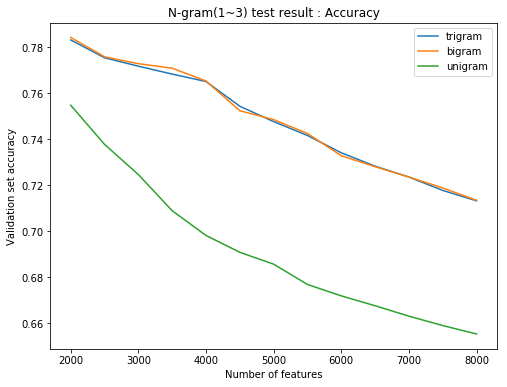

In [36]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [37]:
mf_ = 2000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 78.43%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1223    92     1      6     5         0
joy            32  1445     1      0     3         0
love           35   198   120      3     0         1
anger         109   110     1    413    13         2
fear           82    92     1     10   308        23
surprise       32   115     0      2    32       131
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.95      0.64      0.76       648
         joy       0.85      0.60      0.70       516
        love       0.70      0.98      0.82      1481
       anger       0.97      0.34      0.50       357
        fear       0.81      0.92      0.86      1327
    surprise       0.83      0.42      0.56       312

   micro avg       0.78

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


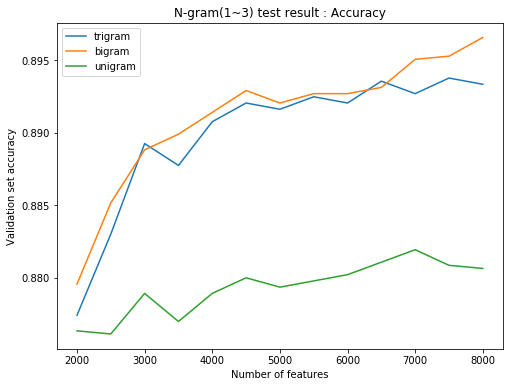

In [38]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [39]:
mf_ = 7000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 89.51%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1246    40     7     20    10         4
joy            19  1380    55      5     9        13
love            5    65   282      3     2         0
anger          43    35     1    544    23         2
fear           21    17     2      6   433        37
surprise        3    20     1      2    17       269
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.94      0.84      0.89       648
         joy       0.88      0.84      0.86       516
        love       0.89      0.93      0.91      1481
       anger       0.81      0.79      0.80       357
        fear       0.93      0.94      0.94      1327
    surprise       0.83      0.86      0.84       312

   micro avg       0.90

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


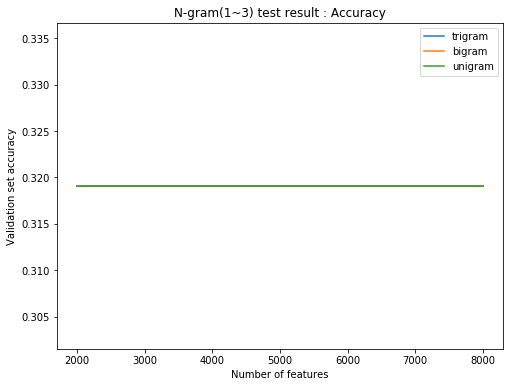

In [40]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [41]:
mf_ = 7000
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 31.91%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness         0  1327     0      0     0         0
joy             0  1481     0      0     0         0
love            0   357     0      0     0         0
anger           0   648     0      0     0         0
fear            0   516     0      0     0         0
surprise        0   312     0      0     0         0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       648
         joy       0.00      0.00      0.00       516
        love       0.32      1.00      0.48      1481
       anger       0.00      0.00      0.00       357
        fear       0.00      0.00      0.00      1327
    surprise       0.00      0.00      0.00       312

   micro avg       0.32

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3445378151260504
0.31286360698125404
0.32967032967032966
0.32385261797026504
0.3206205559146736
0.35100193923723333
0.3251454427925016
0.3102779573367809
0.3367808661926309
0.32858990944372574
Avg Accuracy 0.32833410406654456


C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


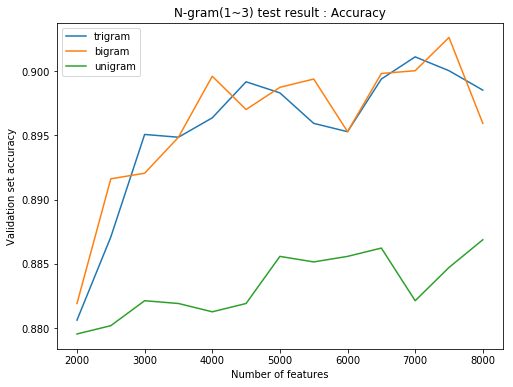

In [42]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [43]:
mf_ = 7000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 90.05%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1247    41     8     16    11         4
joy            17  1385    49      5    11        14
love            7    60   284      3     1         2
anger          39    27     2    552    25         3
fear           15    16     1      8   430        46
surprise        5    15     1      4     6       281
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.94      0.85      0.89       648
         joy       0.89      0.83      0.86       516
        love       0.90      0.94      0.92      1481
       anger       0.82      0.80      0.81       357
        fear       0.94      0.94      0.94      1327
    surprise       0.80      0.90      0.85       312

   micro avg       0.90

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8784744667097608
0.9062702003878474
0.898513251454428
0.9133807369101486
0.9127343244990304
0.9049773755656109
0.8972204266321914
0.8959276018099548
0.8939883645765999
0.907503234152652
Avg Accuracy 0.9008989982698224


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


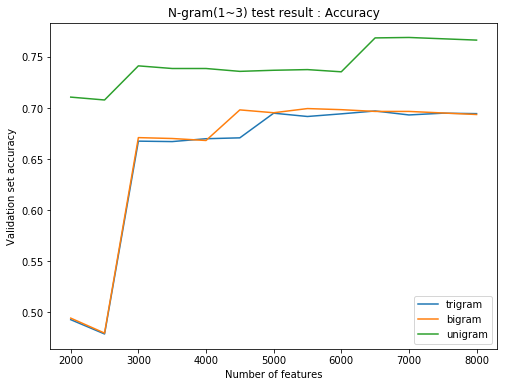

In [44]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [45]:
mf_ = 6500
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 76.86%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1064   150    14     58    34         7
joy            59  1294    40     44    28        16
love           31   100   190     21    14         1
anger          75    53     6    485    26         3
fear           40    53     4     34   363        22
surprise       20    63     4     18    36       171
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.73      0.75      0.74       648
         joy       0.72      0.70      0.71       516
        love       0.76      0.87      0.81      1481
       anger       0.74      0.53      0.62       357
        fear       0.83      0.80      0.81      1327
    surprise       0.78      0.55      0.64       312

   micro avg       0.77

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


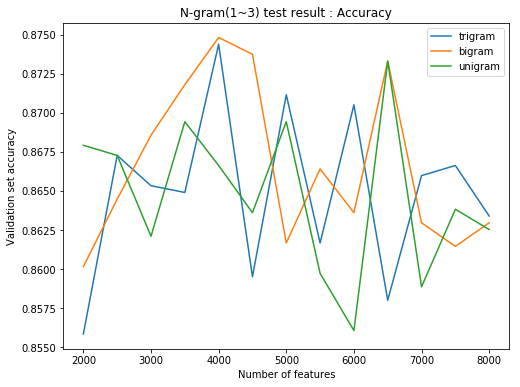

In [46]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [47]:
mf_ = 4000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.40%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1165    72    11     40    29        10
joy            39  1331    55     18    23        15
love            6    72   272      2     2         3
anger          30    42     1    534    34         7
fear           17    21     2     13   417        46
surprise        2     7     0      3     9       291
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.82      0.85       648
         joy       0.81      0.81      0.81       516
        love       0.86      0.90      0.88      1481
       anger       0.80      0.76      0.78       357
        fear       0.93      0.88      0.90      1327
    surprise       0.78      0.93      0.85       312

   micro avg       0.86